In [30]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [6]:
df = pd.read_csv("../data/oscars.csv")

print(df.head())


               film ceremony  actor_in_a_leading_role  \
0                38     59th                        0   
1  Crocodile Dundee     59th                        0   
2    Round Midnight     59th                        1   
3                10     52nd                        0   
4    102 Dalmatians     73rd                        0   

   actor_in_a_supporting_role  actress_in_a_leading_role  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   actress_in_a_supporting_role  animated_feature_film  animated_short_film  \
0                             0                      0                    0   
1                             0                      0                    0   
2                             0                      0     

In [7]:
print(df.info())
print(df.isnull().sum())
print(df.duplicated().sum())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4648 entries, 0 to 4647
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   film                          4648 non-null   object 
 1   ceremony                      4648 non-null   object 
 2   actor_in_a_leading_role       4648 non-null   int64  
 3   actor_in_a_supporting_role    4648 non-null   int64  
 4   actress_in_a_leading_role     4648 non-null   int64  
 5   actress_in_a_supporting_role  4648 non-null   int64  
 6   animated_feature_film         4648 non-null   int64  
 7   animated_short_film           4648 non-null   int64  
 8   best_picture                  4648 non-null   int64  
 9   cinematography                4648 non-null   int64  
 10  costume_design                4648 non-null   int64  
 11  directing                     4648 non-null   int64  
 12  documentary_feature_film      4648 non-null   int64  
 13  doc

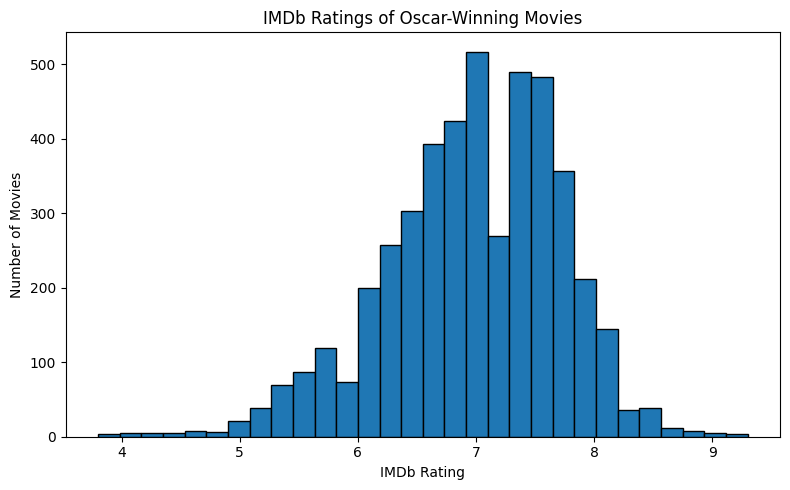

In [47]:
# IMDb Ratings of Oscar Winning Movie

plt.figure(figsize=(8, 5))
plt.hist(df['imdb_rating'].dropna(), bins=30, edgecolor='black')
plt.title("IMDb Ratings of Oscar-Winning Movies")
plt.xlabel("IMDb Rating")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()



Most Oscar winning movies have IMDb ratings between 6.5 and 8.0, with very few outliers below 5 or above 9. This suggests that highly rated films are more likely to receive Oscar recognition.


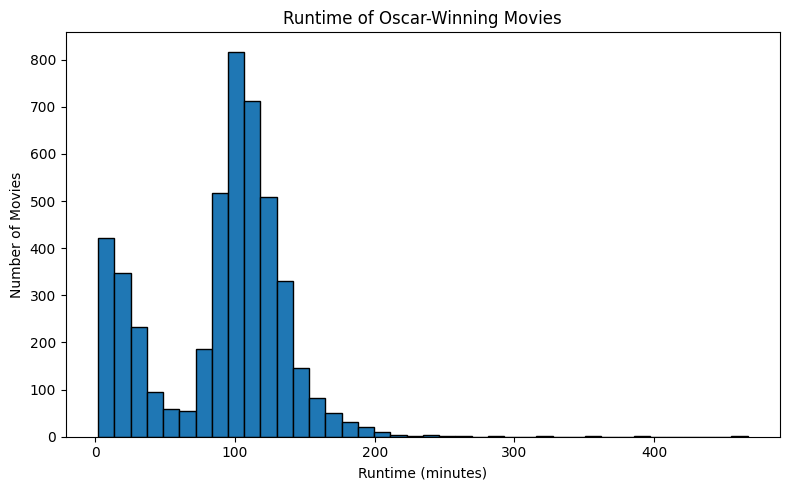

In [46]:
# Oscar Winning Movie Runtimes

plt.figure(figsize=(8, 5))
plt.hist(df['runtime_mins'].dropna(), bins=40, edgecolor='black')
plt.title("Runtime of Oscar-Winning Movies")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()



This histogram shows the runtime of Oscar winning movies. Most winners run between 90 and 130 minutes, but some extend beyond 2 hours, showing that longer films are not uncommon among Oscar winners.


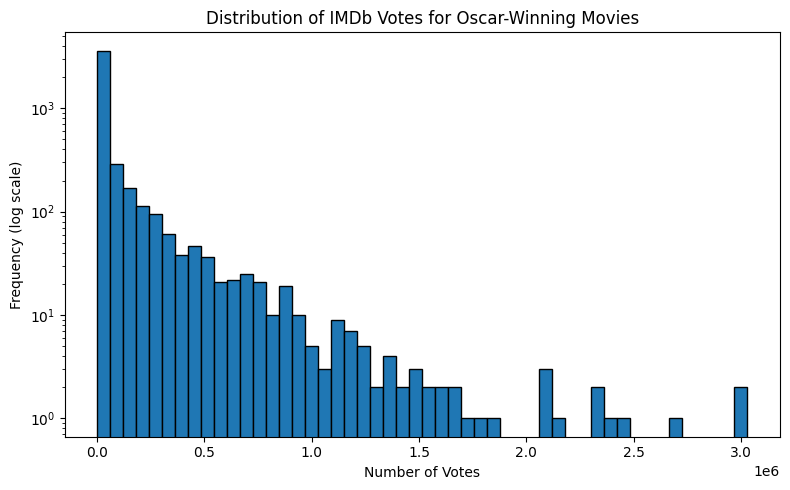

In [45]:
#Distribution of IMDb votes for oscar winning movies

plt.figure(figsize=(8, 5))
plt.hist(df['num_votes'], bins=50, log=True, edgecolor='black')
plt.title("Distribution of IMDb Votes for Oscar-Winning Movies")
plt.xlabel("Number of Votes")
plt.ylabel("Frequency (log scale)")
plt.tight_layout()
plt.show()




This histogram shows the number of IMDb votes received by Oscar-winning movies. Most winners had fewer than 10,000 votes, but a small number of popular films received over a million. This suggests that both widely viewed and less mainstream films can win Oscars.


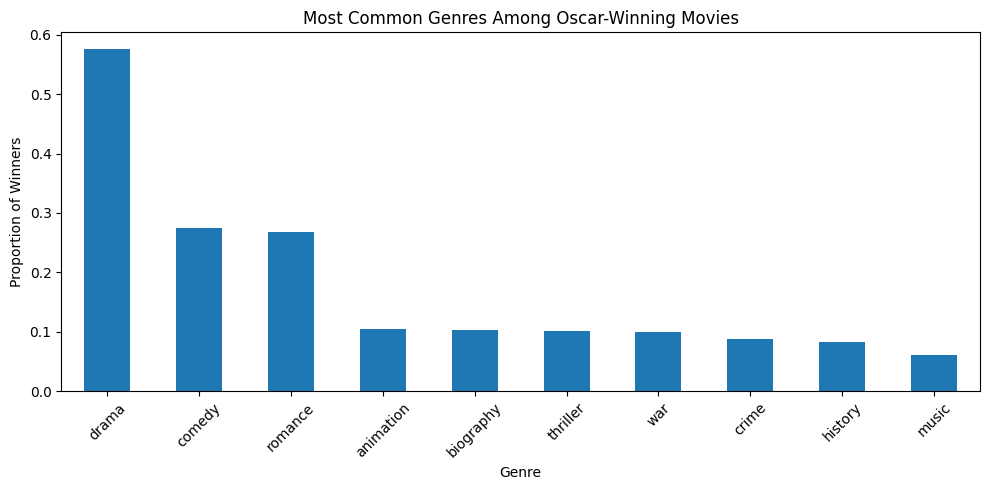

In [43]:
#Most Common Genres Among Oscar-Winning Movies

# Select genres of interest
genre_cols = ['drama', 'comedy', 'biography', 'crime', 'history', 
              'romance', 'music', 'war', 'thriller', 'animation']

# Calculate the proportion of winning movies that fall into each genre
genre_props = df[genre_cols].sum().sort_values(ascending=False) / len(df)

# Plot
plt.figure(figsize=(10, 5))
ax = genre_props.plot(kind='bar')
plt.title("Most Common Genres Among Oscar-Winning Movies")
plt.ylabel("Proportion of Winners")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




Drama is by far the most common genre among Oscar-winning movies, appearing in over half of them. Comedy and romance also appear frequently, while genres like animation, crime, and music are much less common.


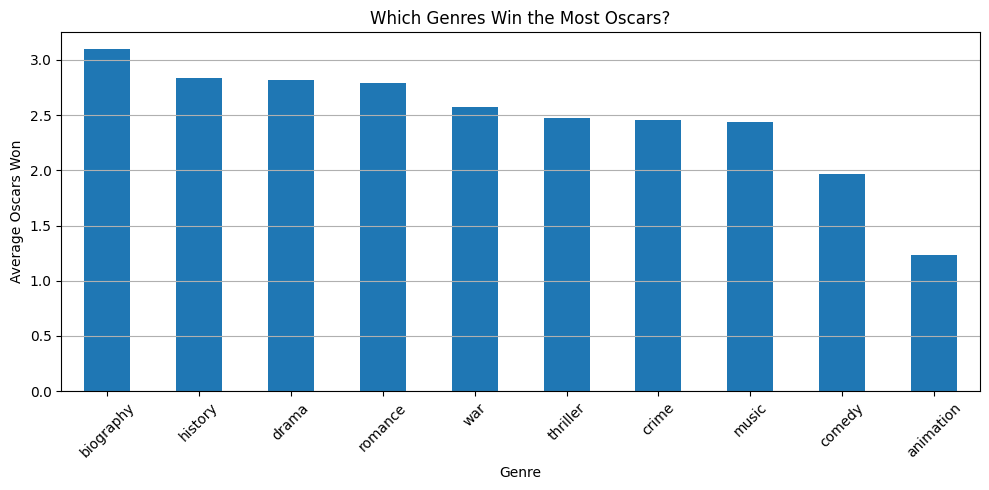

In [41]:
# Which Genres Win the Most Oscars?

# Group by genre and get average Oscars won
genre_cols = ['biography', 'history', 'drama', 'romance', 'war', 'thriller', 'crime', 'music', 'comedy', 'animation']
avg_oscars = df[genre_cols + ['total_oscars_won']].copy()

# Melt and group
melted = avg_oscars.melt(id_vars='total_oscars_won', var_name='genre', value_name='present')
genre_avg = melted[melted['present'] == 1].groupby('genre')['total_oscars_won'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
genre_avg.plot(kind='bar')
plt.title("Which Genres Win the Most Oscars?")
plt.ylabel("Average Oscars Won")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Biographies, historical films, and dramas tend to win the most Oscars on average. Genres like comedy and animation win fewer awards overall. This suggests that serious, real life storytelling may be more successful with Oscar voters.


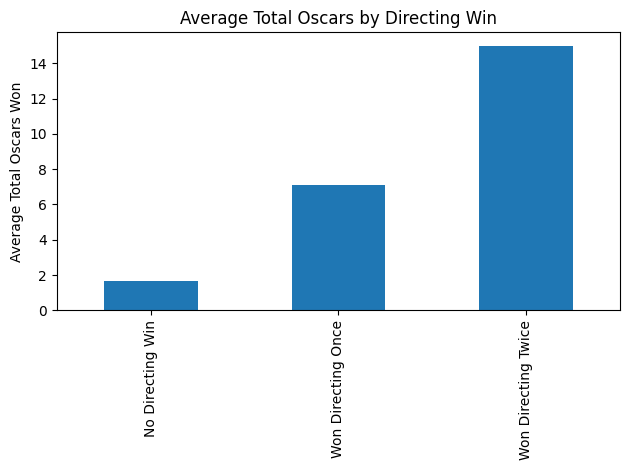

In [39]:
#Total Oscars won by directing win
ax = df.groupby('directing')['total_oscars_won'].mean().plot(kind='bar')
ax.set_xticklabels(['No Directing Win', 'Won Directing Once', 'Won Directing Twice'])
plt.title("Average Total Oscars by Directing Win")
plt.xlabel("")
plt.ylabel("Average Total Oscars Won")
plt.tight_layout()
plt.show()



This chart shows how many total Oscars a movie tends to win, depending on whether it won Best Directing.

- Movies that didn’t win Best Directing usually won 1–2 Oscars overall.
- Movies that did win Best Directing often won 7 or more Oscars.
- A small number of movies with multiple directing wins (like shared credits) won even more.

This suggests that winning Best Directing is a strong signal that a movie is highly successful at the Oscars overall.



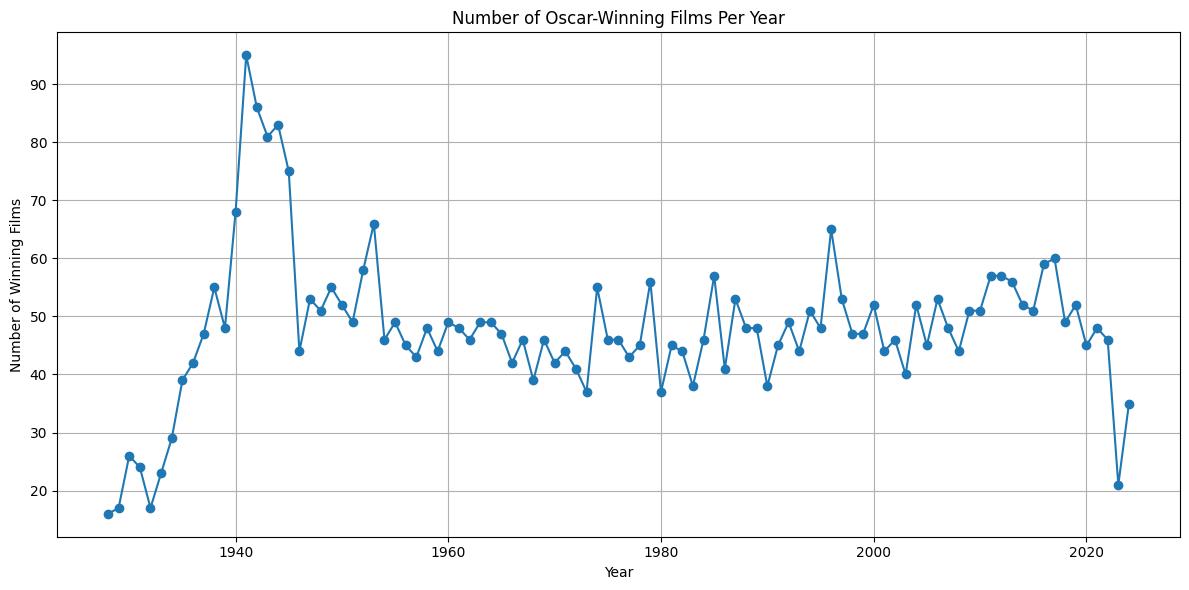

In [40]:
# Count number of winning movies per year
plt.figure(figsize=(12, 6))

# Plot the number of winning films per year
df.groupby('year')['film'].nunique().plot(marker='o', linestyle='-')

plt.title("Number of Oscar-Winning Films Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Winning Films")
plt.grid(True)
plt.tight_layout()
plt.show()



This plot shows how many films won at least one Oscar each year. The number increased rapidly in the 1930s and 1940s, peaked around 1941, and then stabilized. This could reflect changes in how Oscars are awarded or the growth of the film industry.


In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4648 entries, 0 to 4647
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   film                          4648 non-null   object 
 1   ceremony                      4648 non-null   object 
 2   actor_in_a_leading_role       4648 non-null   int64  
 3   actor_in_a_supporting_role    4648 non-null   int64  
 4   actress_in_a_leading_role     4648 non-null   int64  
 5   actress_in_a_supporting_role  4648 non-null   int64  
 6   animated_feature_film         4648 non-null   int64  
 7   animated_short_film           4648 non-null   int64  
 8   best_picture                  4648 non-null   int64  
 9   cinematography                4648 non-null   int64  
 10  costume_design                4648 non-null   int64  
 11  directing                     4648 non-null   int64  
 12  documentary_feature_film      4648 non-null   int64  
 13  doc

In [52]:
print("Unique values in 'won':", df['won'].unique())


Unique values in 'won': [1]
